In [22]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data presentation and manipulation

In [ ]:
data = pd.read_csv('./data/auto_red.csv')
data.head(4)


,manufacturer,aspiration,doors,body,drive,engine_location,engine_type,cylinders,fuel_system,horsepower,peak_rpm,city_mpg,highway_mpg,price,diesel,gas
0,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,111.0,5000.0,21,27,13495.0,0,1
1,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,111.0,5000.0,21,27,16500.0,0,1
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,154.0,5000.0,19,26,16500.0,0,1
3,audi,std,four,sedan,fwd,front,ohc,four,mpfi,102.0,5500.0,24,30,13950.0,0,1


In [25]:
def fuel_setter(val):
  if val == 1:
    return 'gas'
  else:
    return 'diesel'

data['fuel'] = data['gas'].apply(fuel_setter)
fdf = data.drop(columns=['diesel', 'gas'])


In [26]:
fdf['num_doors'] = fdf['doors'].apply(lambda x: 2 if x == 'two' else 4)

def cylinder_setter(cval):
  if cval == 'two':
    return 2
  elif cval == 'three':
    return 4
  elif cval == 'four':
    return 4
  elif cval == 'five':
    return 5
  elif cval == 'six':
    return 6
  elif cval == 'eight':
    return 8
  else:
    return 12


fdf['num_cylinders'] = fdf['cylinders'].apply(cylinder_setter)

cdf = fdf.drop(columns=['doors', 'cylinders'])
cdf.head(4)


,manufacturer,aspiration,body,drive,engine_location,engine_type,fuel_system,horsepower,peak_rpm,city_mpg,highway_mpg,price,fuel,num_doors,num_cylinders
0,alfa-romero,std,convertible,rwd,front,dohc,mpfi,111.0,5000.0,21,27,13495.0,gas,2,4
1,alfa-romero,std,convertible,rwd,front,dohc,mpfi,111.0,5000.0,21,27,16500.0,gas,2,4
2,alfa-romero,std,hatchback,rwd,front,ohcv,mpfi,154.0,5000.0,19,26,16500.0,gas,2,6
3,audi,std,sedan,fwd,front,ohc,mpfi,102.0,5500.0,24,30,13950.0,gas,4,4


In [27]:
cdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     4000 non-null   object 
 1   aspiration       4000 non-null   object 
 2   body             4000 non-null   object 
 3   drive            4000 non-null   object 
 4   engine_location  4000 non-null   object 
 5   engine_type      4000 non-null   object 
 6   fuel_system      4000 non-null   object 
 7   horsepower       4000 non-null   float64
 8   peak_rpm         4000 non-null   float64
 9   city_mpg         4000 non-null   int64  
 10  highway_mpg      4000 non-null   int64  
 11  price            4000 non-null   float64
 12  fuel             4000 non-null   object 
 13  num_doors        4000 non-null   int64  
 14  num_cylinders    4000 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 468.9+ KB


In [28]:
cdf.describe()


,horsepower,peak_rpm,city_mpg,highway_mpg,price,num_doors,num_cylinders
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,102.803016,5119.779249,25.079000,30.78025,13262.071000,3.122000,4.351750
std,36.688477,471.224279,6.441516,6.89564,8081.591772,0.992654,1.038649
min,48.000000,4150.000000,13.000000,16.00000,5118.000000,2.000000,2.000000
25%,70.000000,4800.000000,19.000000,25.00000,7775.000000,2.000000,4.000000
50%,95.000000,5200.000000,24.000000,30.00000,10245.000000,4.000000,4.000000
75%,116.000000,5500.000000,30.000000,36.00000,16500.000000,4.000000,4.000000
max,262.000000,6600.000000,49.000000,54.00000,45400.000000,4.000000,12.000000


<Axes: >

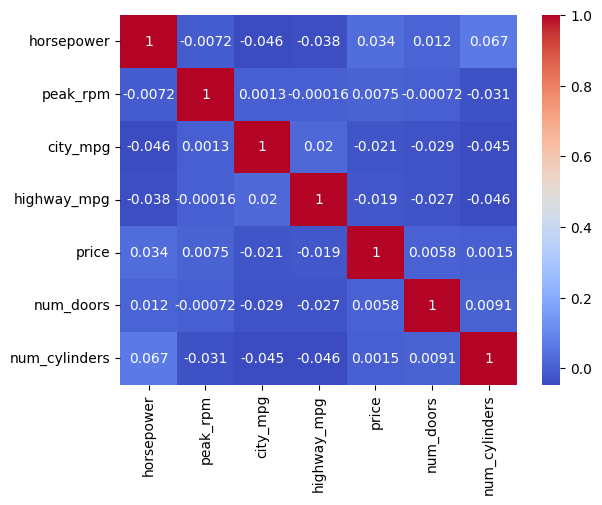

In [29]:
ncdf = cdf.select_dtypes(include=['number'])
cm = ncdf.corr()
sns.heatmap(cm, cmap='coolwarm', annot=True)


In [30]:
# Label encoding

columns_to_encode = ['manufacturer', 'aspiration', 'body', 'drive', 'engine_location', 'engine_type', 'fuel_system', 'fuel']
label_encoders = {}

for col in columns_to_encode:
  le = LabelEncoder()
  cdf[col] = le.fit_transform(cdf[col])
  label_encoders[col] = le

cdf.head()


,manufacturer,aspiration,body,drive,engine_location,engine_type,fuel_system,horsepower,peak_rpm,city_mpg,highway_mpg,price,fuel,num_doors,num_cylinders
0,0,0,0,2,0,0,5,111.0,5000.0,21,27,13495.0,1,2,4
1,0,0,0,2,0,0,5,111.0,5000.0,21,27,16500.0,1,2,4
2,0,0,2,2,0,4,5,154.0,5000.0,19,26,16500.0,1,2,6
3,1,0,3,1,0,2,5,102.0,5500.0,24,30,13950.0,1,4,4
4,1,0,3,0,0,2,5,115.0,5500.0,18,22,17450.0,1,4,5


## Modelling

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

y = cdf['price']
X = cdf.drop(columns = ['price', 'engine_location', 'engine_type', 'fuel', 'aspiration', 'peak_rpm'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Length(X_train):")
print(X_train.shape[0])
print("\nTest Features Length(X_test):")
print(X_test.shape[0])
print("\nTraining Target Length(y_train):")
print(y_train.shape[0])
print("\nTest Target Length(y_test):")
print(y_test.shape[0])


Training Features Length(X_train):
3200

Test Features Length(X_test):
800

Training Target Length(y_train):
3200

Test Target Length(y_test):
800


In [32]:
# LightGBM

import lightgbm as lgb
from sklearn.metrics import root_mean_squared_error


train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
  'objective': 'regression',
  'metric': 'rmse',
  'boosting_type': 'gbdt',
  'learning_rate': 0.03,
  'num_leaves': 31,
  'max_depth': -1,
  'feature_fraction': 0.8,
  'bagging_fraction': 0.8,
  'bagging_freq': 5,
  'verbose': 1,
  'early_stopping_rounds': 50
}

model = lgb.train(
  params,
  train_data,
  num_boost_round=1000,
  valid_sets=[train_data, test_data]
)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 9
[LightGBM] [Info] Start training from score 13266.339375
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[114]	training's rmse: 7215.83	valid_1's rmse: 7995.55
RMSE: 7995.548789806183


In [33]:
# Model export

import pickle

with open('/content/drive/MyDrive/VA_final_project/model.pkl', 'wb') as model_file:
  pickle.dump(model, model_file)

with open('/content/drive/MyDrive/VA_final_project/encoders.pkl', 'wb') as encoders_file:
  pickle.dump(label_encoders, encoders_file)



## Explainability

The summary plot is used to modify our model so that it has a reasonable amount of features.

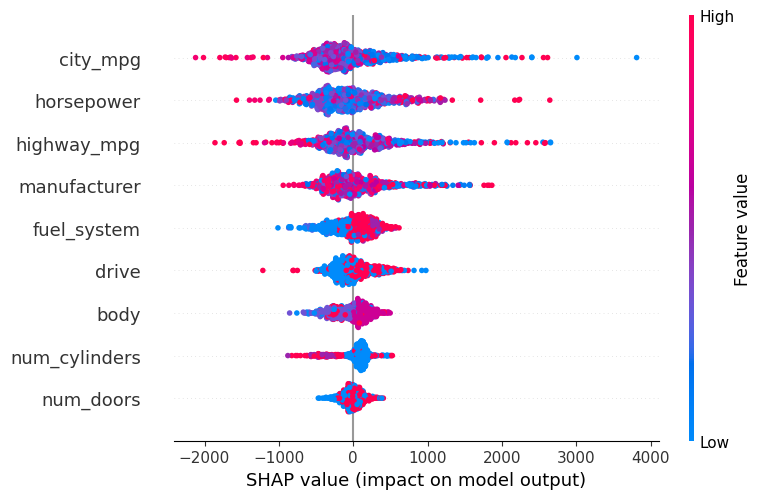

In [34]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


## Extra models

In [ ]:
# Linear Regressor

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# print(f"Predictions: {y_pred}")
# print(f"Actual Values: {y_test.values}")
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 8178.929003439541
R-squared: -0.005119700271284833


In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 8284.058391380673


In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 6, 8, 10, 12]
n_estimatorsint = [50, 100, 200, 300, 500]
parameters = {'max_depth': max_depth, 'n_estimators': n_estimatorsint}

random_forest_reg = RandomForestRegressor(random_state=42)

gs = GridSearchCV(random_forest_reg, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

best_reg = gs.best_estimator_
best_reg.fit(X_train, y_train)
y_pred = best_reg.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")


Root Mean Squared Error (RMSE): 8079.035736357199
R2 Score: 0.0192824053802938
